id                                                   x       ...  \
        count  mean       std   min   25%   50%   75%   max count mean  ...   
dataset                                                                 ...   
I        11.0   5.0  3.316625   0.0   2.5   5.0   7.5  10.0  11.0  9.0  ...   
II       11.0  16.0  3.316625  11.0  13.5  16.0  18.5  21.0  11.0  9.0  ...   
III      11.0  27.0  3.316625  22.0  24.5  27.0  29.5  32.0  11.0  9.0  ...   
IV       11.0  38.0  3.316625  33.0  35.5  38.0  40.5  43.0  11.0  9.0  ...   

                        y                                                      
          75%   max count      mean       std   min    25%   50%   75%    max  
dataset                                                                        
I        11.5  14.0  11.0  7.500909  2.031568  4.26  6.315  7.58  8.57  10.84  
II       11.5  14.0  11.0  7.500909  2.031657  3.10  6.695  8.14  8.95   9.26  
III      11.5  14.0  11.0  7.500000  2.030424  5.39  6.250  7.11  7.98  12.74  
IV        8.0  19.0  11.0  7.500909  2.030579  5.25  6.170  7.04  8.19  12.50  

[4 rows x 24 columns]

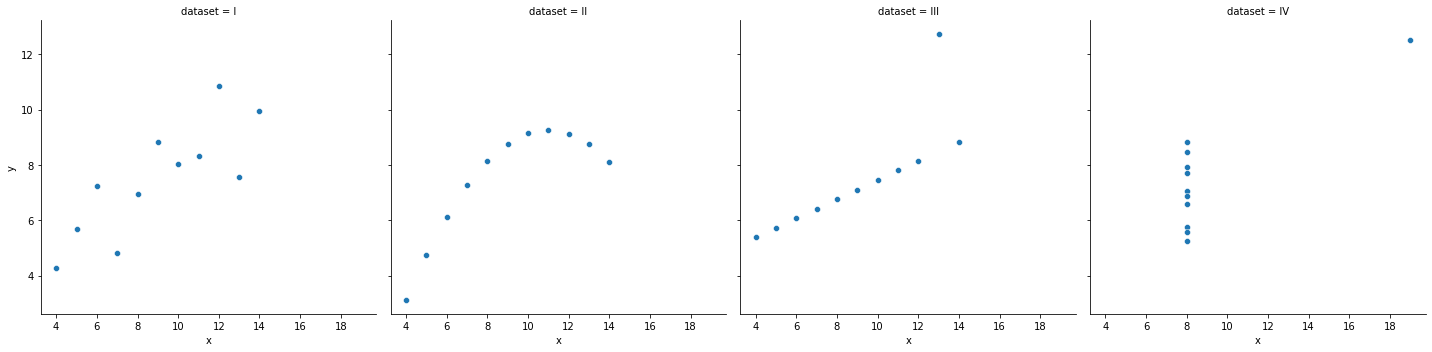

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

df = pd.read_csv(url)

sns.relplot(x='x', y='y', col='dataset', data=df)
df.groupby("dataset").describe()


### Empirical Rule"/"Three Sigma Rule":
- 1 std dev: 68%
- 2 std dev: 95%
- 3 std dev: 99.7%


## Exercises

In [2]:
# 1. Using lemonade.csv dataset and focusing on continuous variables:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv")
df.head()


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
df.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['date', 'day', 'temperature', 'rainfall', 'flyers', 'price', 'sales'], dtype='object')

In [7]:
# Explore data

numeric_cols = ['temperature', 'rainfall', 'flyers', 'price', 'sales']

categorical_cols = ['day']

In [8]:
df.date = pd.to_datetime(df.date)

In [9]:
df = df.set_index(df.date)

In [10]:
df = df.drop(columns=(['date']))

In [11]:
df.head()

,day,temperature,rainfall,flyers,price,sales
date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [12]:
df.columns

Index(['day', 'temperature', 'rainfall', 'flyers', 'price', 'sales'], dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          365 non-null    object 
 1   temperature  365 non-null    float64
 2   rainfall     365 non-null    float64
 3   flyers       365 non-null    int64  
 4   price        365 non-null    float64
 5   sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 20.0+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


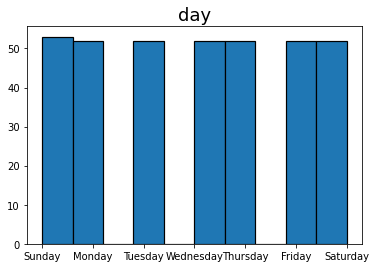

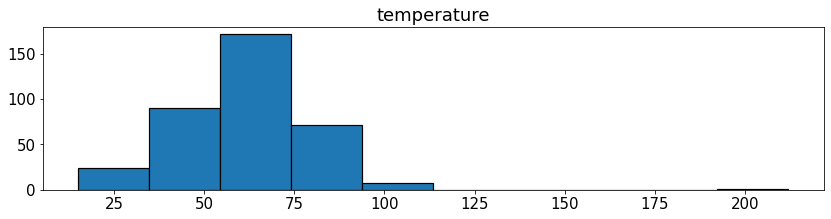

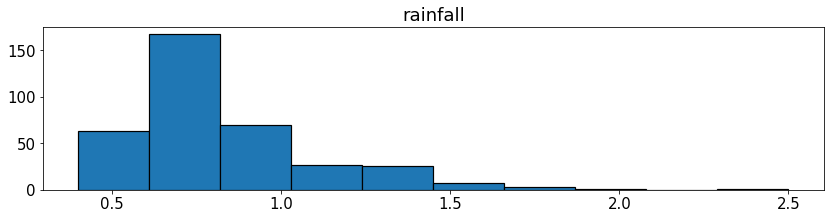

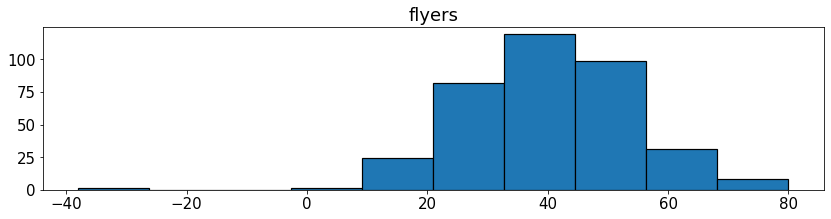

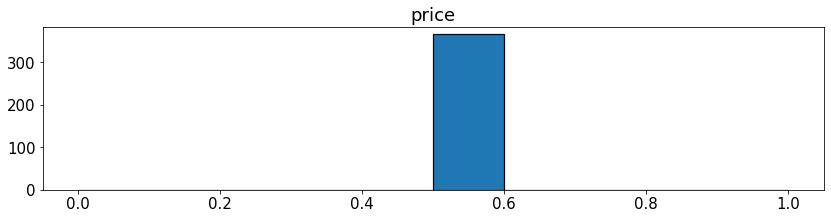

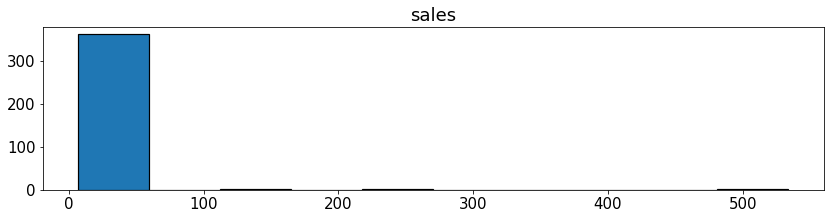

In [15]:

columns = ['day', 'temperature', 'rainfall', 'flyers', 'price', 'sales']

for col in df.columns:
    plt.hist(x=col, data=df, linewidth=1.2, edgecolor='black')
    plt.rc('font', size=15)
    plt.rc('figure', figsize=(14, 3))
    plt.title(col)
    plt.show()

In [16]:
df.index.min(), df.index.max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [17]:
len(df.index)

365

In [18]:
df.index.nunique()

365

### 1. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [19]:
# IQR Rule: IQR is 75th pctile - 25th pctile. 1.5x IQR = mild outlier,
# 3x IQR = extreme outlier
q1 = df.quantile(0.25)
q2 = df.quantile(0.50)
q3 = df.quantile(0.75)
q4 = df.quantile(1)

In [20]:
IQR = q3-q1
IQR

temperature    22.00
rainfall        0.26
flyers         18.00
price           0.00
sales          10.00
dtype: float64

In [21]:
higher_inner_fence = ((1.5*IQR) + q3)
higher_inner_fence

temperature    104.7
rainfall         1.3
flyers          76.0
price            0.5
sales           45.0
dtype: float64

In [22]:
lower_inner_fence = (q1 - (1.5*IQR))
lower_inner_fence

temperature    16.70
rainfall        0.26
flyers          4.00
price           0.50
sales           5.00
dtype: float64

In [23]:
higher_outter_fence = ((3*IQR) + q3)
higher_outter_fence

temperature    137.70
rainfall         1.69
flyers         103.00
price            0.50
sales           60.00
dtype: float64

In [24]:
lower_outter_fence = (q1 - (3*IQR))
lower_outter_fence

temperature   -16.30
rainfall       -0.13
flyers        -23.00
price           0.50
sales         -10.00
dtype: float64

In [25]:
df.head()

,day,temperature,rainfall,flyers,price,sales
date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [26]:
# IQR Rule: IQR is 75th pctile - 25th pctile. 1.5x IQR = mild outlier,
# 3x IQR = extreme outlier
q1 = df.quantile(0.25)
q2 = df.quantile(0.50)
q3 = df.quantile(0.75)
q4 = df.quantile(1)

IQR = q3-q1

higher_inner_fence = ((1.5*IQR) + q3)

lower_inner_fence = (q1 - (1.5*IQR))

higher_outter_fence = ((3*IQR) + q3)

lower_outter_fence = (q1 - (3*IQR))


def get_lower_and_upper_bounds(series, multiplier):
    q1 = series.quantile(0.25)
    q2 = series.quantile(0.50)
    q3 = series.quantile(0.75)
    q4 = series.quantile(1)
    IQR = q3-q1
    upper_bound = ((multiplier*IQR) + q3)
    lower_bound = (q1 - (multiplier*IQR))
    print('For:', series.name, '\n'
        'The multiplier is:', multiplier, '\n'
        'The upper bound is:', upper_bound, '\n'
         "The lower bound is:", lower_bound)
    return upper_bound, lower_bound
    

In [27]:
series_upper, series_lower = get_lower_and_upper_bounds(df.temperature, 1.5)
series_upper, series_lower

For: temperature 
The multiplier is: 1.5 
The upper bound is: 104.7 
The lower bound is: 16.700000000000003


(104.7, 16.700000000000003)

<AxesSubplot:>

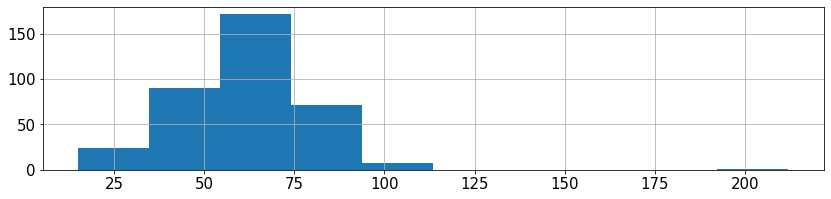

In [28]:
df.temperature.hist()

In [29]:
# yes, dropping these outliers makes sense

In [30]:
df.columns

Index(['day', 'temperature', 'rainfall', 'flyers', 'price', 'sales'], dtype='object')

In [31]:
numeric_columns = ['temperature', 'rainfall', 'flyers', 'price', 'sales']

for col in numeric_columns:
    get_lower_and_upper_bounds(df[col], 1.5)

For: temperature 
The multiplier is: 1.5 
The upper bound is: 104.7 
The lower bound is: 16.700000000000003
For: rainfall 
The multiplier is: 1.5 
The upper bound is: 1.3 
The lower bound is: 0.26
For: flyers 
The multiplier is: 1.5 
The upper bound is: 76.0 
The lower bound is: 4.0
For: price 
The multiplier is: 1.5 
The upper bound is: 0.5 
The lower bound is: 0.5
For: sales 
The multiplier is: 1.5 
The upper bound is: 45.0 
The lower bound is: 5.0


In [32]:
outliers_df = pd.DataFrame()
high_temp = df.temperature[df.temperature>higher_inner_fence.temperature]
low_temp = df.temperature[df.temperature<lower_inner_fence.temperature]

outliers_df['high_temp'] = high_temp
#outliers_df['low_temp'] = low_temp
outliers_df = pd.concat([outliers_df, low_temp])

high_temp, low_temp

(date
 2017-02-11    212.0
 Name: temperature, dtype: float64,
 date
 2017-12-31    15.1
 Name: temperature, dtype: float64)

In [33]:
outliers_df.head()

,high_temp,0
date,,
2017-02-11,212.0,NaN
2017-12-31,NaN,15.1


In [35]:
outliers_df = outliers_df.rename(columns={0:'low_temp'})
outliers_df.head()

,high_temp,low_temp
date,,
2017-02-11,212.0,NaN
2017-12-31,NaN,15.1
